<a href="https://colab.research.google.com/github/Sachin-Analyst/FUTURE_DS_03/blob/main/Student_Feedback_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is the Task - 03 of College Event Feedback Analysis ,assigned by Future Interns , Done by Vishnu Ram Sachin D**


**Testing the notebook**

In [82]:
print("Hello World")

Hello World


**Installing pandas for analysis, Matplotlib and seaborn for visualization**

In [83]:
!pip install pandas

In [84]:
!pip install matplotlib

In [85]:
!pip install seaborn

In [86]:
!pip install numpy

**Importing Pandas as pd , Matplotlib as plt and seaborn as sns**

In [87]:
import pandas as pd


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
import numpy as np

In [90]:
df = pd.read_csv("/content/student_feedback.csv")

In [91]:
display(df.columns)

Index(['S.NO', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   S.NO                                                  1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [93]:
print(df.head())

   S.NO  Student ID  Well versed with the subject  \
0     0         340                             5   
1     1         253                             6   
2     2         680                             7   
3     3         806                             9   
4     4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                                    5               

 **Descriptive Statistics and Visualization of All Columns**

**Calculating and visualizing the mean ratings for each feedback category**

In [94]:
df_ratings = df.drop(columns=['S.NO','Student ID'])

In [95]:
mean_ratings = df_ratings.mean().sort_values(ascending=False)

In [96]:
print(mean_ratings)

Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


**Creating Bar chart for Mean Ratings**

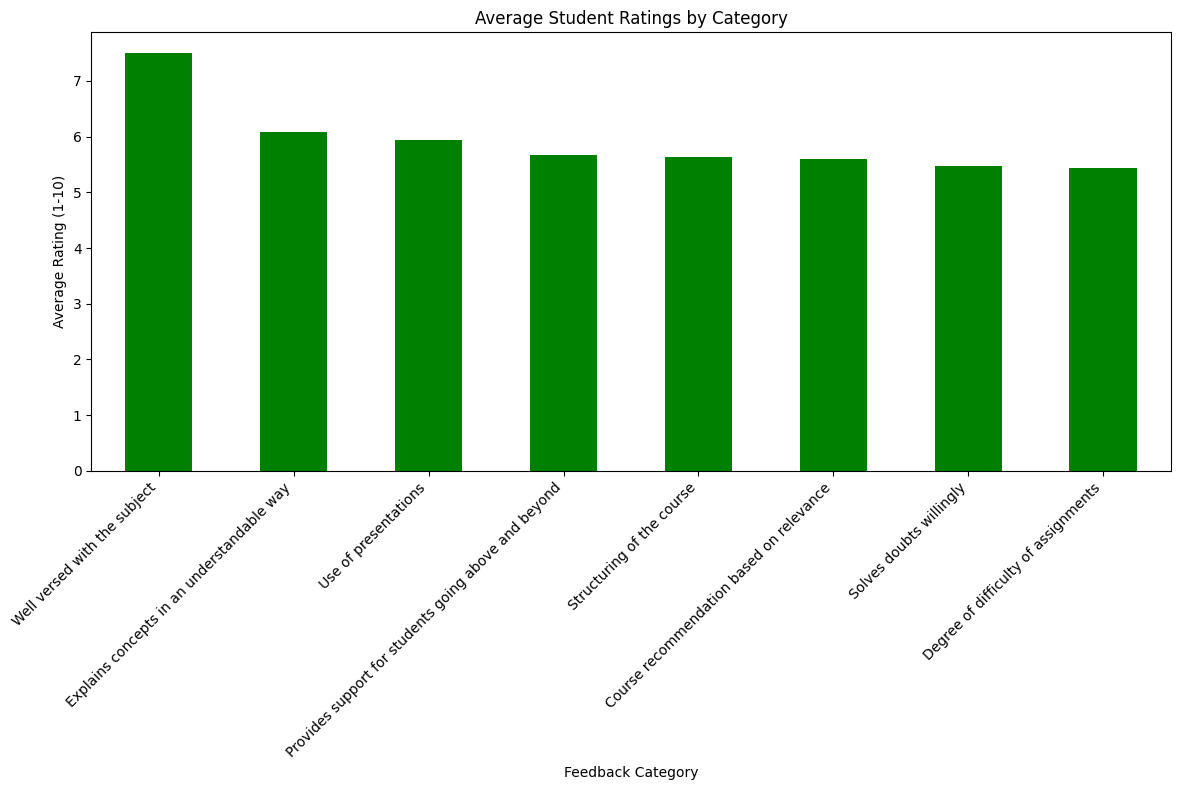

In [97]:
plt.figure(figsize=(12, 8))
mean_ratings.plot(kind='bar', color='Green')
plt.title('Average Student Ratings by Category')
plt.xlabel('Feedback Category')
plt.ylabel('Average Rating (1-10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('average_ratings.png')
plt.show()

**Radar chart for Mean Rating**

In [98]:
mean_ratings = df_ratings.mean().sort_values(ascending=False)

In [99]:
labels = mean_ratings.index.tolist()
values = mean_ratings.values.tolist()
labels.append(labels[0])
values.append(values[0])

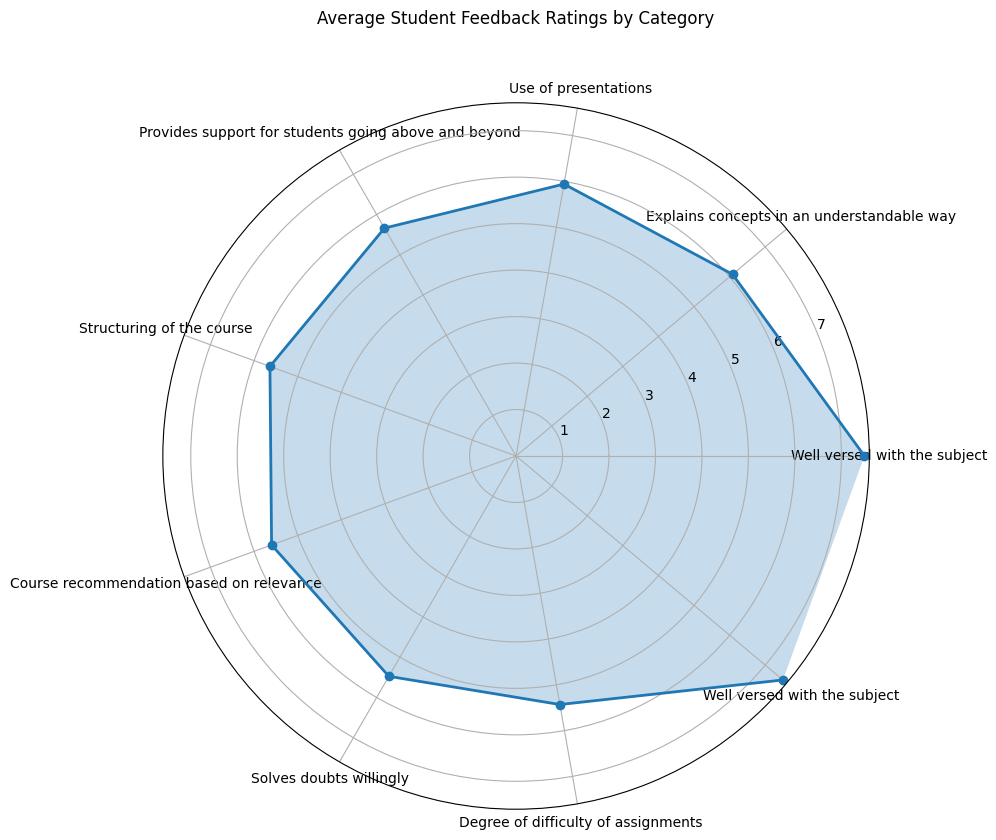

In [100]:
categories = labels
values = values

num_categories = len(categories)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

fig, ax = plt.figure(figsize=(10, 10)), plt.subplot(polar=True)

ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles), categories)
ax.set_title('Average Student Feedback Ratings by Category', y=1.1)
ax.grid(True)

plt.tight_layout()
plt.show()

**Correlation Analysis**

In [101]:
correlation_matrix = df_ratings.corr()

In [102]:
print(correlation_matrix)

                                                    Well versed with the subject  \
Well versed with the subject                                            1.000000   
Explains concepts in an understandable way                              0.008916   
Use of presentations                                                   -0.024674   
Degree of difficulty of assignments                                    -0.007087   
Solves doubts willingly                                                -0.056981   
Structuring of the course                                              -0.027490   
Provides support for students going above and b...                      0.031488   
Course recommendation based on relevance                               -0.015143   

                                                    Explains concepts in an understandable way  \
Well versed with the subject                                                          0.008916   
Explains concepts in an understandable way     

**Creating heatmap for correlation of Student feedback ratings**

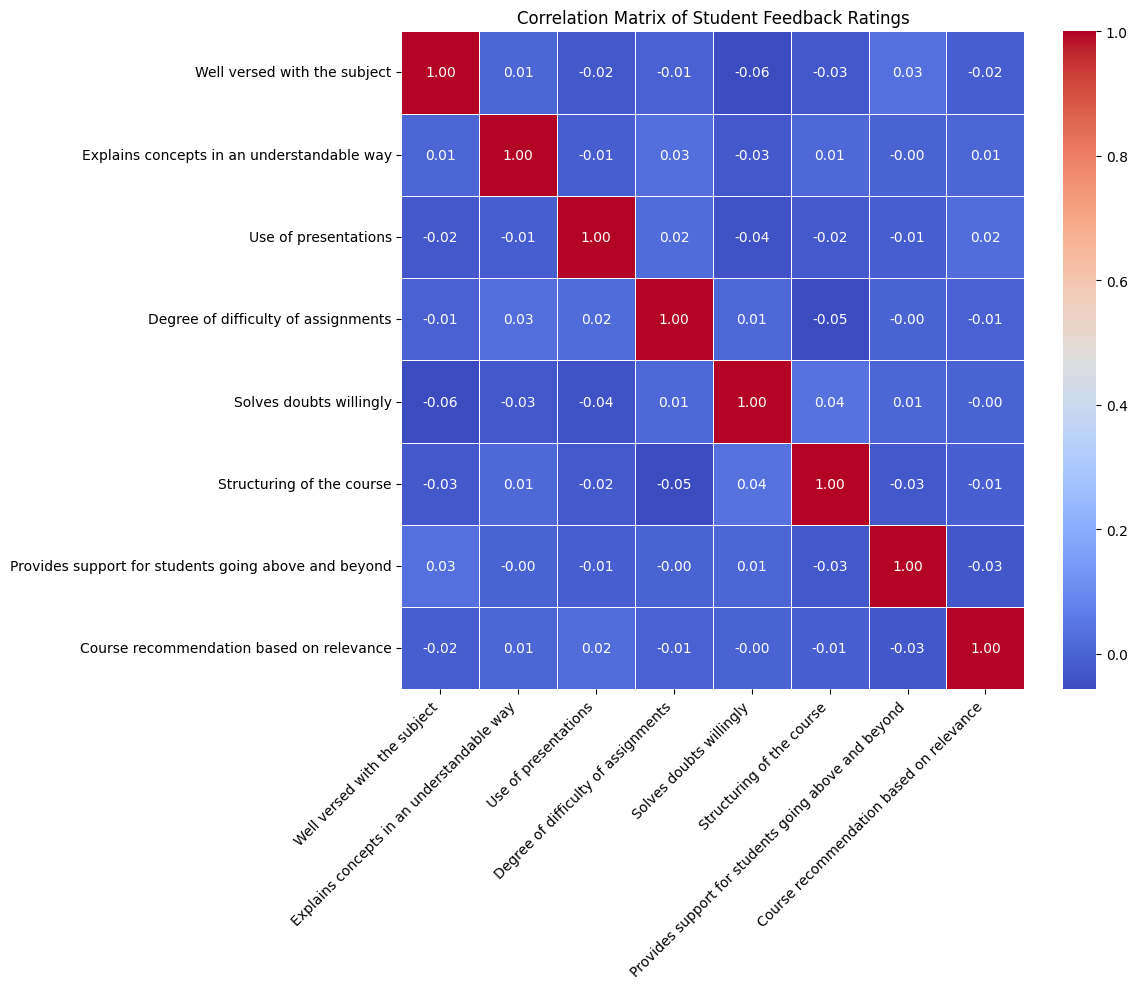

In [103]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Correlation Matrix of Student Feedback Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

**Analyzing the distribution of the Well versed with the subject ratings**

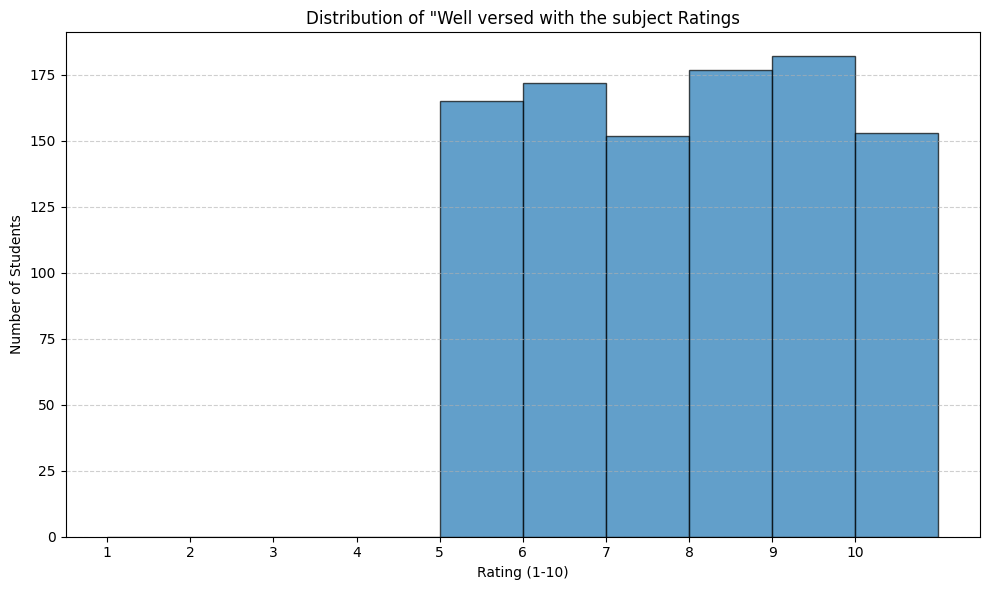

In [104]:
plt.figure(figsize=(10, 6))
plt.hist(df['Well versed with the subject'],
         bins=range(1, 12),
         edgecolor='black',
         alpha=0.7)
plt.title('Distribution of "Well versed with the subject Ratings')
plt.xlabel('Rating (1-10)')
plt.ylabel('Number of Students')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('rating_distribution_histogram.png')
plt.show()

**Distribution of Overall Student Satisfaction Scores**

In [105]:
df['Overall_Satisfaction'] = df_ratings.mean(axis=1)

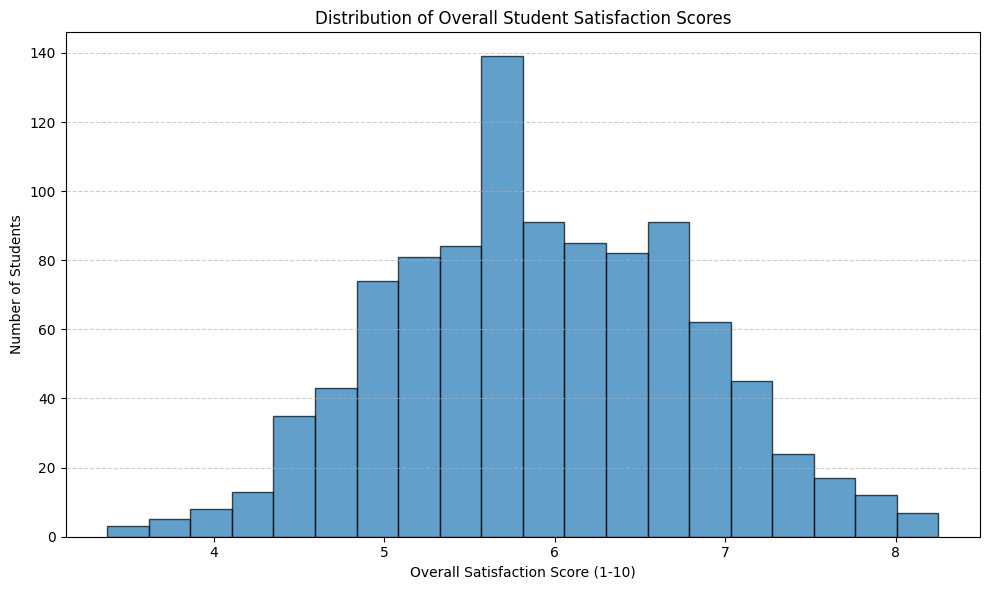

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(df['Overall_Satisfaction'],
         bins=20,
         edgecolor='black',
         alpha=0.7)
plt.title('Distribution of Overall Student Satisfaction Scores')
plt.xlabel('Overall Satisfaction Score (1-10)')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('overall_satisfaction_histogram.png')
plt.show()

In [107]:
most_satisfied = df.sort_values(by='Overall_Satisfaction', ascending=False).head(10)
least_satisfied = df.sort_values(by='Overall_Satisfaction', ascending=True).head(10)

In [108]:
print(most_satisfied[['Student ID', 'Overall_Satisfaction']])


     Student ID  Overall_Satisfaction
199         770                 8.250
110         188                 8.250
692         238                 8.250
580          78                 8.125
658         269                 8.125
646         426                 8.125
103         671                 8.125
304         604                 8.000
437         512                 8.000
869         383                 8.000


In [109]:
print(least_satisfied[['Student ID', 'Overall_Satisfaction']])

     Student ID  Overall_Satisfaction
644         281                 3.375
592          54                 3.375
743         724                 3.500
612          73                 3.625
285         450                 3.625
950         126                 3.750
17          807                 3.750
583         983                 3.750
722         178                 3.875
19          799                 3.875


**Top 3  with Most Satisfaction and Least Satisfaction**

In [110]:
display(most_satisfied.head(3))

,S.NO,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Satisfaction
199,199,770,10,10,5,7,10,7,7,10,8.25
110,110,188,7,6,8,9,9,8,9,10,8.25
692,692,238,8,7,5,10,10,9,7,10,8.25


In [111]:
display(least_satisfied.head(3))

,S.NO,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Satisfaction
644,644,281,5,6,6,3,4,1,1,1,3.375
592,592,54,7,2,5,1,5,3,1,3,3.375
743,743,724,5,2,6,1,7,3,3,1,3.500


**High Impact Analysis**

In [112]:
feedback_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance' ]

In [113]:
avg_scores = df[feedback_columns].mean()

In [114]:
df['Overall_Satisfaction'] = df[feedback_columns].mean(axis=1)

In [115]:
correlations = df[feedback_columns].corrwith(df['Overall_Satisfaction']).sort_values(ascending=False)


In [116]:
high_impact_analysis = pd.DataFrame({
    'Average_Score': avg_scores,
    'Correlation_with_Overall_Satisfaction': correlations
}).sort_values(by='Average_Score', ascending=True)

In [117]:
print(high_impact_analysis.to_markdown(numalign="left", stralign="left"))

|                                                      | Average_Score   | Correlation_with_Overall_Satisfaction   |
|:-----------------------------------------------------|:----------------|:----------------------------------------|
| Degree of difficulty of assignments                  | 5.43057         | 0.392695                                |
| Solves doubts willingly                              | 5.47453         | 0.392453                                |
| Course recommendation based on relevance             | 5.5984          | 0.388351                                |
| Structuring of the course                            | 5.63636         | 0.379754                                |
| Provides support for students going above and beyond | 5.66234         | 0.384881                                |
| Use of presentations                                 | 5.94206         | 0.176207                                |
| Explains concepts in an understandable way           | 6.08192

**Analyzing the distribution for remaining columns**

*I droped Well versed with subject and Overall satisfaction is I have already analyzed distribution for them in above code*

In [118]:
rating_columns = df.columns.drop(['S.NO', 'Student ID', 'Well versed with the subject','Overall_Satisfaction']).tolist()
print(rating_columns)

['Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


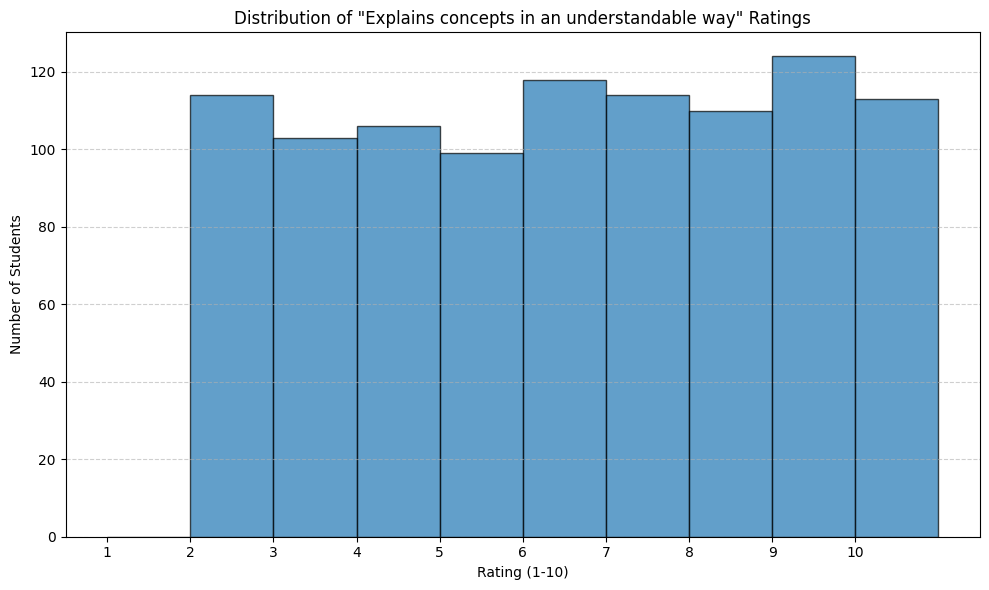

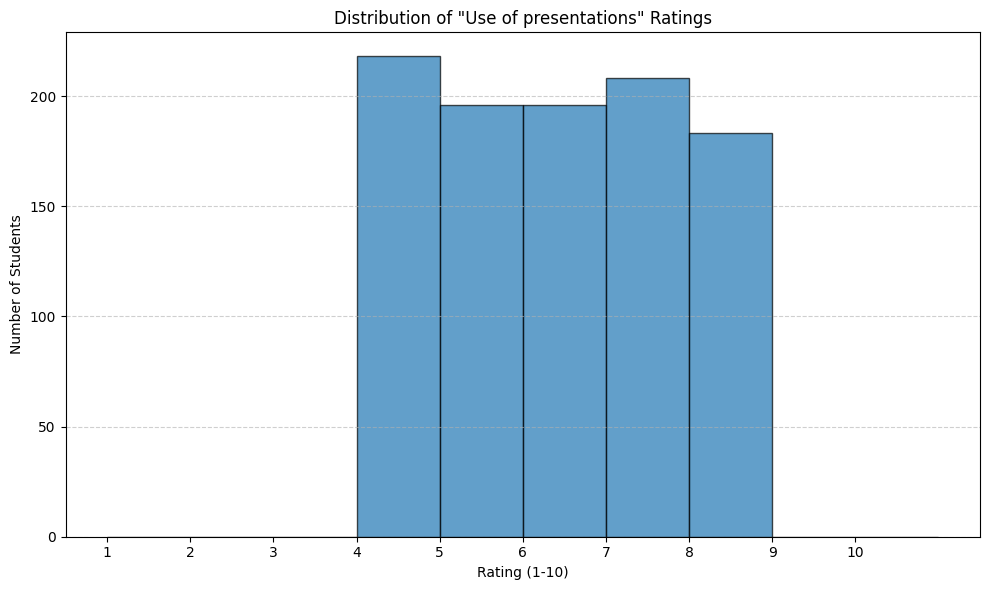

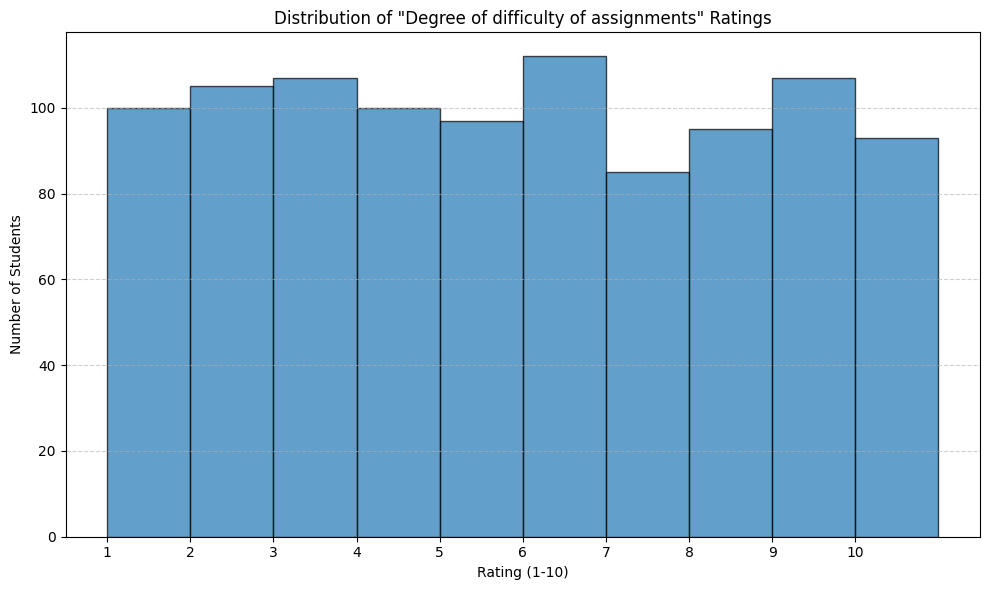

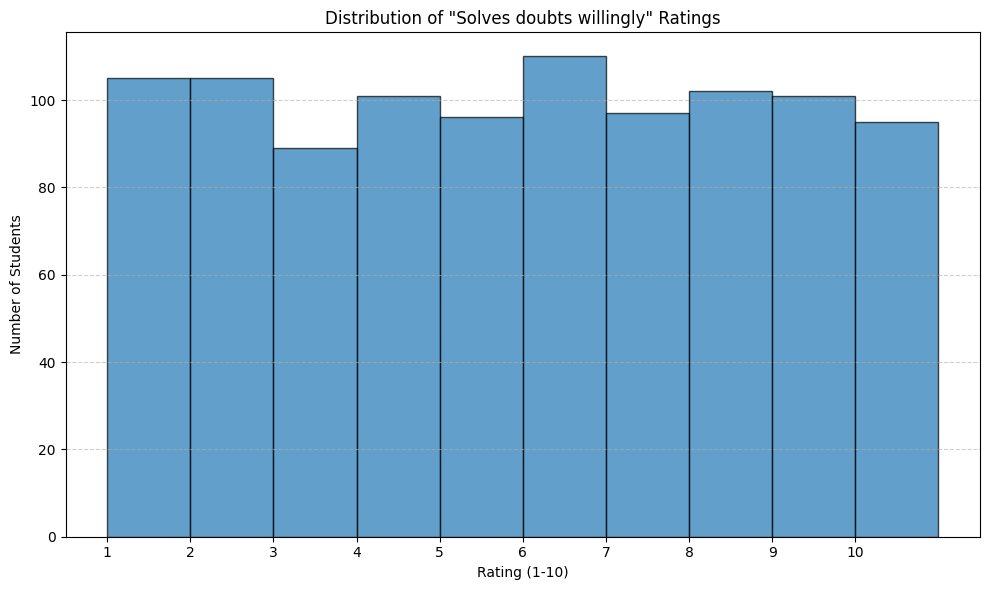

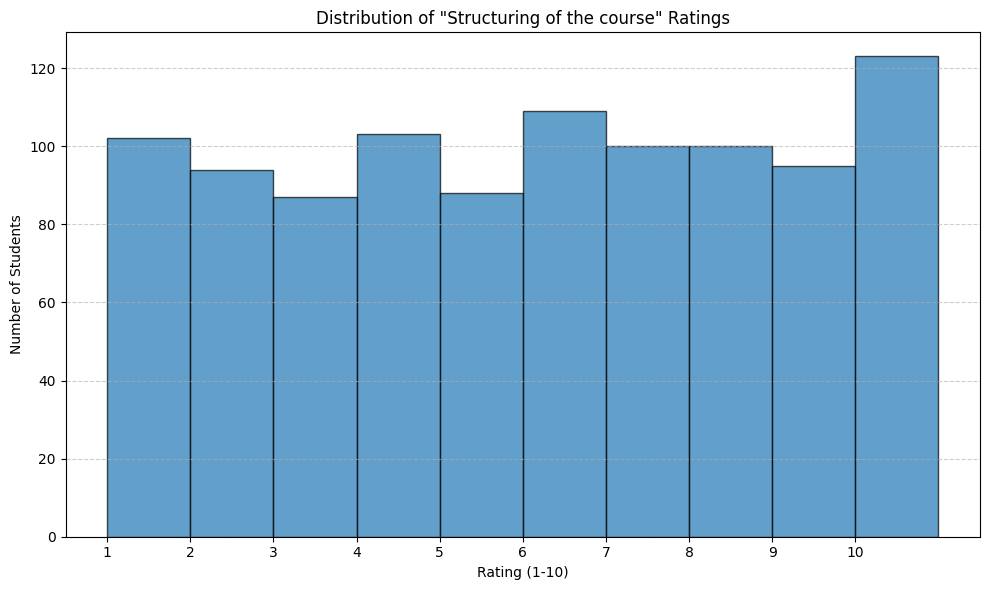

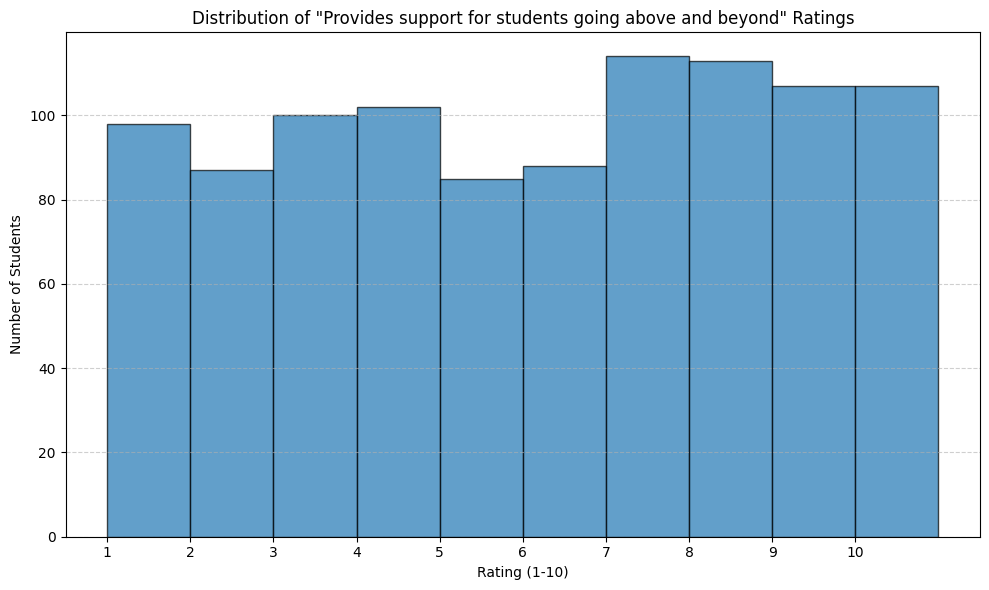

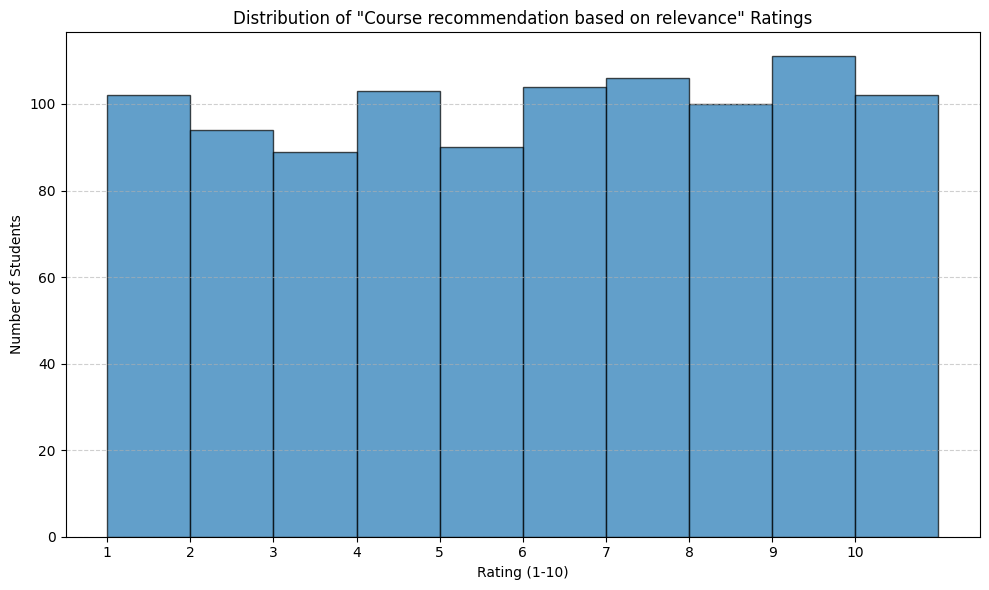

In [119]:
for column in rating_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=range(1, 12), edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of "{column}" Ratings')
    plt.xlabel('Rating (1-10)')
    plt.ylabel('Number of Students')
    plt.xticks(range(1, 11))
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()